In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:

#Load the dataset
file_path = 'census_income.csv'
data = pd.read_csv(file_path)

In [20]:
# Explore the dataset
print("First few rows of the dataset:")
print(data.head())

print("\nColumn names:")
print(data.columns)

print("\nSummary statistics:")
print(data.describe())

print("\nClass distribution:")
print(data['Income'].value_counts())


First few rows of the dataset:
   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0        

In [24]:
# Data preprocessing
# Convert categorical variables to numerical values using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [22]:
# Separate features and target variable
X = data.drop('Income', axis=1)
y = data['Income']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Train a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [28]:
# print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[6904  491]
 [ 895 1478]]


In [29]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7395
           1       0.75      0.62      0.68      2373

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768



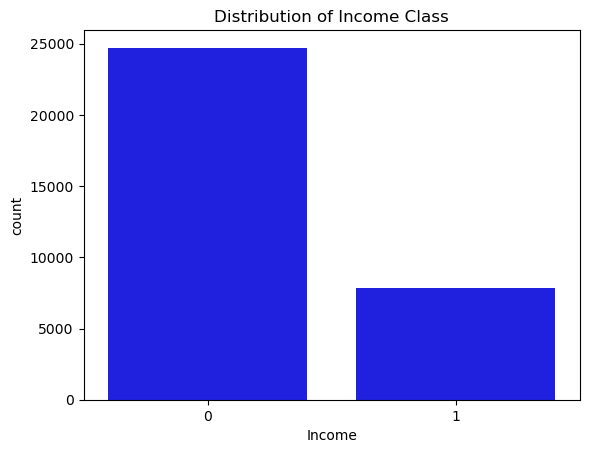

In [41]:
# Exploratory Data Analysis
# Plot the distribution of the income class
sns.countplot(x='Income', data=data, color='blue')
plt.title('Distribution of Income Class')
plt.show()

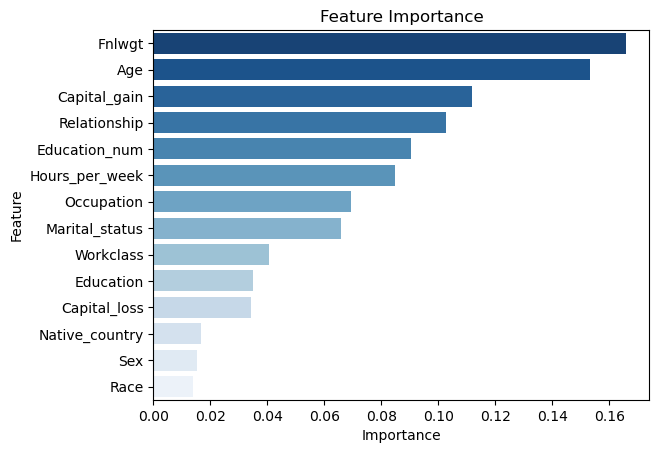

In [37]:
# Plot features importance
importances = model.feature_importances_
features = X.columns

feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues_r')
plt.title('Feature Importance')
plt.show()